<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_5%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비선형함수 신경망모형(코사인함수(cos(4πx)))
* 대표적 비선형함수 cos함수 추정정

In [13]:
#패키지 설치
install.packages("neuralnet")
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




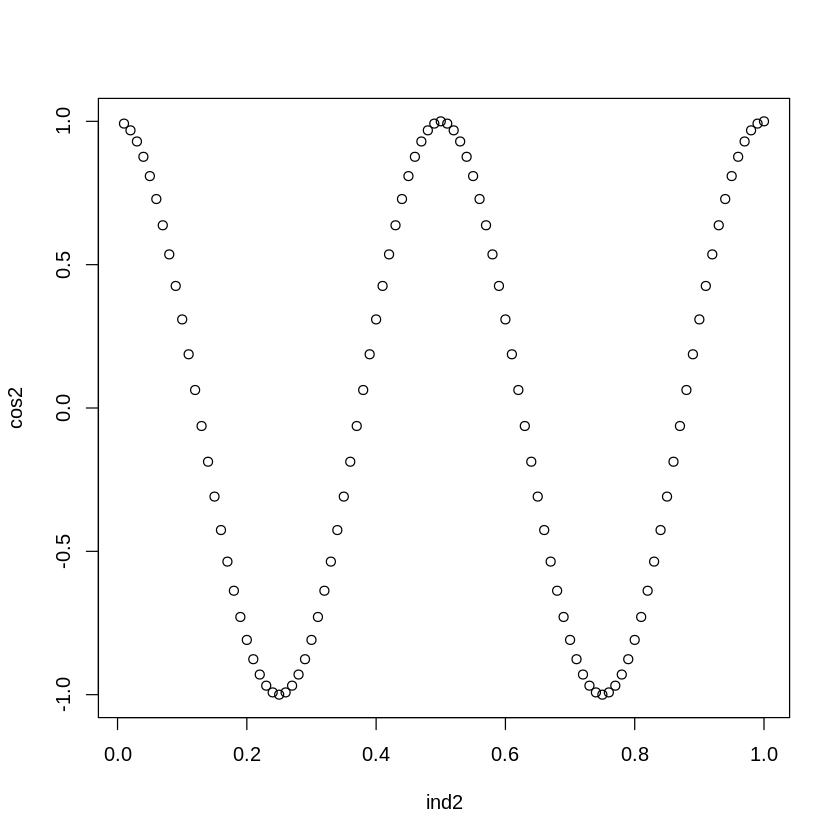

In [31]:
#코사인함수 생성
set.seed(130)
ind1 = 1:100
ind2 = ind1/100
cos2 = cos(ind2*4*pi)
cdat = data.frame(cbind(ind2, cos2))
plot(cdat)

In [ ]:
#신경망모형 학습
cos2.nn = neuralnet(cos2 ~ ind2, data = cdat, hidden = 5, linear.output = T) #회귀문제이므로 T
plot(cos2.nn)

In [40]:
#예측
#cos.pred = compute(cos2.nn, ind2)
#plot(ind1, cos.pred$net.result)
#lines(cos2)
ind2

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
 [16] 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30
 [31] 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45
 [46] 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60
 [61] 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75
 [76] 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.90
 [91] 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

##보스턴하우징데이터(예측문제)

In [32]:
#패키지 가져오기
library(MASS)

In [33]:
#데이터 불러오기
bdat = Boston

In [34]:
#신경망에 사용하는 수치형 변수를 0~1사이의 값으로 바꾸기
#bdat데이터의 열 중 max값 & min값
max1 = apply(bdat, 2, max)
min1 = apply(bdat, 2, min)

sdat = scale(bdat, center = min1, scale = max1 - min1)
sdat = as.data.frame(sdat)

In [35]:
#훈련/검증데이터 분리
set.seed(100)
i = sample(1:nrow(bdat), round(0.5*nrow(bdat)))
train.dat = sdat[i,]
test.dat = sdat[-i, ]

In [36]:
#신경망 학습
n= names(train.dat)
form = as.formula(paste("medv ~ ", paste(n[!n %in% "medv"], collapse = " + ")))
nn1 = neuralnet(form, data = train.dat, hidden = c(5, 3), linear.output = T)
plot(nn1)

In [44]:
#예측
pred.nn1 = compute(nn1, test.dat[,1:13])
pred1 = pred.nn1$net.result*(max(bdat$medv)-min(bdat$medv))+min(bdat$medv)

In [46]:
#예측평균제곱오차
PMSE.bdat = sum((bdat[-i, 14] - pred1)^2)/nrow(test.dat)
cat("PMSE : ", PMSE.bdat)

PMSE :  13.68262

##독일신용평가데이터(목표변수:범주형 -> 분류문제)
* 목표변수 : 신용등급
* 입력변수 : 그외 변수
* 분류문제 : linear.output = F

In [2]:
#사용패키지
install.packages("dummy")
library(dummy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

dummy 0.1.3

dummyNews()



In [3]:
#데이터 가져오기
url_german = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt"
german = read.table(url_german, header=T)

In [14]:
dvar = c(4, 9, 10, 15, 17)
german2 = dummy(x = german[, dvar])
german2 = german2[, -c(10, 14, 17, 20, 24)]
german2 = cbind(german[, -dvar], german2)

for(i in 1:ncol(german2)){
  if(!is.numeric(german2[,i]))
  german2[, i] = as.numeric(german2[,i])}

german2$y = ifelse(german$y=="good", 1, 0)

set.seed(1000)
i = sample(1:nrow(german2), round(0.75*nrow(german2)))
max.german = apply(german2, 2, max)
min.german = apply(german2, 2, min)

gdat = scale(german2, center = min.german, scale = max.german - min.german)
gdat = as.data.frame(gdat)

train.german = gdat[i, ]
test.german = gdat[-i, ]





Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


ERROR: ignored

In [15]:
gn = names(german2)
f = as.formula(paste("y ~", paste(gn[!gn %in% "y"], collapse = " + ")))
nn1 = neuralnet(f, data = train.german, hidden = c(3, 2), linear.output = F)

ERROR: ignored

In [16]:
plot(nn1)

ERROR: ignored

In [17]:
pred.nn1 = compute(nn1, test[, c(1:15, 17:dim(german2) [2])])
pred.nn1 = ifelse(pred.nn1$net.result>0.5, 1, 0)

sum(german2[-i. 16]!=pred.nn2)/length(german2[-i, 16])

ERROR: ignored